This notebook runs the mattersim.ipynb on various parameters

In [2]:
import papermill as pm
import scrapbook as sb

In [3]:
output_file = "output.temp.ipynb"

In [15]:
# data for plotting

num_atoms = []
energy_error_abs = []
energy_error_pct = []
energy_error_max = []

def append_nb_data():
    nb = sb.read_notebook(output_file)

    num_atoms.append(nb.scraps["num_atoms"].data)
    energy_error_abs.append(nb.scraps["energy_error_abs"].data)
    energy_error_pct.append(nb.scraps["energy_error_pct"].data)
    energy_error_max.append(nb.scraps["energy_error_max"].data)

In [16]:
trials = [
    {
        "supercell_scaling": [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
    },
    {
        "supercell_scaling": [[2, 0, 0], [0, 2, 0], [0, 0, 2]]
    },
    {
        "supercell_scaling": [[3, 0, 0], [0, 3, 0], [0, 0, 3]]
    },
    {
        "supercell_scaling": [[4, 0, 0], [0, 4, 0], [0, 0, 4]]
    },
    {
        "supercell_scaling": [[4, 0, 0], [0, 4, 0], [0, 0, 5]]
    }
]

In [17]:
for param in trials:
    pm.execute_notebook("mattersim.ipynb", output_file, parameters=param)
    append_nb_data()

Executing: 100%|██████████| 25/25 [01:16<00:00,  3.08s/cell]


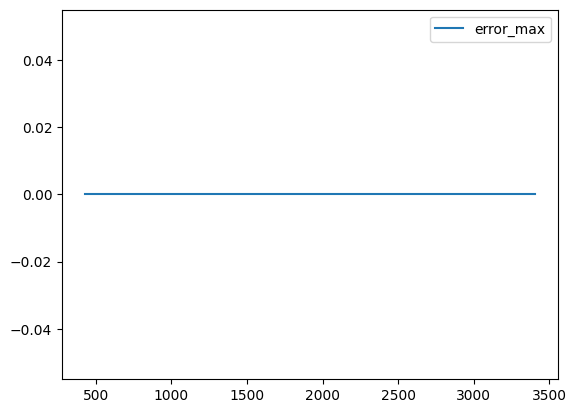

In [20]:
import matplotlib.pyplot as plt
plt.plot(num_atoms, energy_error_max, label="error_max")
plt.legend()
plt.show()